# Giới thiệu về project dự đoán khả năng bị bệnh tim của bệnh nhân
Ngày nay, số lượng các bệnh lý liên quan đến tim (heart disease) ngày càng gia tăng không phân biệt về giới tính hay lứa tuổi. Theo số liệu của WHO, bệnh tim là nguyên nhân gây tử vong lớn nhất thế giới. Trong đó, bệnh tim thiếu máu cục bộ chiếm 16% và đột quỵ chiếm 11% số ca tử vong trên toàn cầu. Kể từ năm 2000, số ca tử vong do căn bệnh này gia tăng nhiều nhất, tăng hơn 2 triệu đến 8,9 triệu ca tử vong vào năm 2019. Các bệnh lý tim thường gặp bào gồm các bệnh liên quan mạch máu (blood vessel diseases) như là bênh động mạch vành (coronary artery disease), các vấn đề loạn nhịp tim (arrhythmias) và dị tật tim bẩm sinh (ongenital heart defects), cùng nhiều bệnh lý khác.

Vì vậy việc dự đoán sớm bệnh tim mạch được coi là một trong những vấn đề quan trọng trong phân tích dữ liệu lâm sàn (clinical data analysis). Nhưng rất khó để xác định chính xác cũng như dự đoán sớm triệu chứng của bệnh tim vì có nhiều yếu tố nhứ tiểu đường, huyết áp cao, cholesterol cao, nhịp tim bất thường và nhiều yếu tố khác. Ngày nay, số lượng dữ liệu trong ngành chăm sóc sức khỏe là rất lớn (big data). Do đó, việc khai thác dữ liệu (data mining) và trích xuất thông tin từ bộ dữ liệu lớn này là cần thiết để hỗ trợ giúp chẩn đoán và phòng ngừa sớm các biến chứng liên quan tim mạch có thể xảy ra. Vì vậy, các nhà khoa học bắt đầu nghiên cứu các phương pháp hiện đại như Khai thác dữ liệu (data mining) và Học máy (machine learing) để dự đoán sớm khả năng bị bệnh tim dựa vào tiền sử sức khoẻ của bệnh nhân.

Trong project này, chúng ta sẽ áp dụng các phương pháp máy học cơ bản để dự đoán xem một người có khả năng mắc bệnh tim hay không dựa trên tập dữ liệu về Bệnh tim Cleveland dataset từ UCI Machine Learning Repository. Tập dữ liệu Cleveland bao gồm 14 thông tin như sau: tuổi (Age), giới tính (sex), trạng thái đau ngực (Chest-pain type), huyết áp khi nghỉ ngơi (Resting Blood Pressure),
nồng độ cholesterol trong huyết thanh (Serum Cholestrol), chỉ số đường nhanh trong máu (Fasting Blood Sugar), kết quả điện tâm đồ khi nghỉ ngơi (Resting ECG ), nhịp tim tối đa (Max heart rate achieved), có bị đau thắt ngực khi tập thể dụng hay không (Exercise induced angina), chỉ số ST lúc tập thể thao so với lúc thư giãn (ST depression induced by exercise relative to res), chỉ số ST trong lúc hoạt động gắng sức (Peak exercise ST segment), Số lượng mạch chính (gồm động mạch, mao mạch và tĩnh mạch) được phát sáng thông qua nội soi huỳnh quang (Number of major vessels (0–3) colored by flourosopy ), thiếu máu tán huyết bẩm sinh (displays the thalassemia), và thông tin có bị biên tim hay không (Diagnosis of heart disease, 0 đại điện cho bệnh nhân không có bệnh, và 1,2,3,4 đại diện cho bệnh nhân có bệnh). Tập dữ liệu Cleveland bao gồm 303 mẫu với 14 thông tin trên được thể hiện thông qua hình 2.

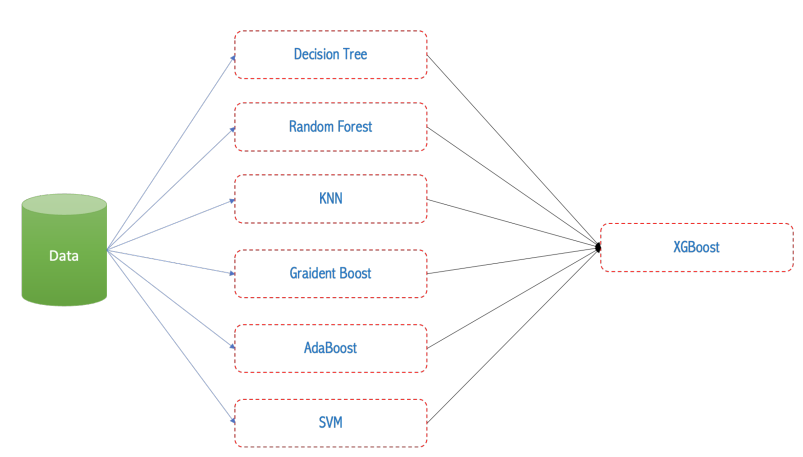

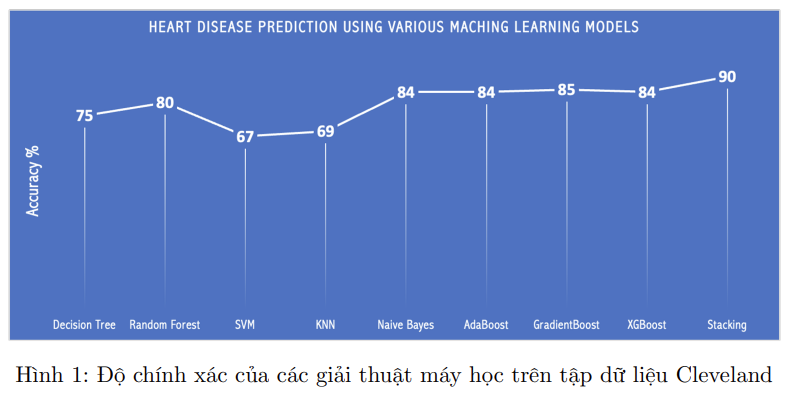

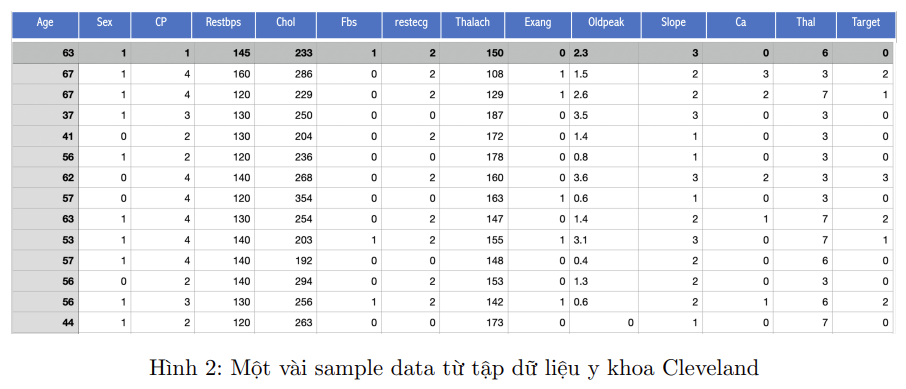

Trong project này chúng ta sẽ sử dụng các giải thuật máy học khác nhau để dự đoán xem bệnh nhân có khả năng bị bệnh tim hay không. Để hoàn thành được project này, AIVN thừa nhận rằng readers đã nắm vững và biết cách sử dụng thư viện sklearn để hiện thực các giải thuật máy học thông dụng cho bài toán classification như: **naive bayes**, **k nearest neigbors (KNN)**, d**ecision tree**, **random forest**, **Adaboost**, **gradient boost**, **XGBoost** và **support vector machine (SVM)**. Cũng như hiểu rõ mô hình máy học tích hợp ensemple theo bagging, boosting và stack. Hình 1 thể hiện mô hình huấn luyện theo phương pháp stacking và độ chính xác của các giải thuật máy học trên tập dữ liệu Cleveland.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('./cleveland.csv', header = None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0:0, 1:1, 2:1, 3:1, 4:1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# Bai tap 1

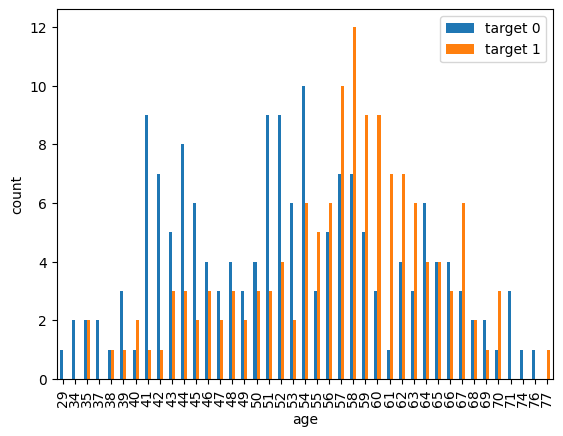

In [9]:

# distribution of target vs age
target_0_by_age = df[df['target'] == 0].groupby("age").agg({"target": "count"})
target_1_by_age = df[df['target'] == 1].groupby("age").agg({"target": "count"})
target_by_age = target_0_by_age.join(target_1_by_age, how="outer", lsuffix=" 0", rsuffix=" 1")
target_by_age = target_by_age.fillna(0)
ax = target_by_age.plot.bar()
ax.set_ylabel("count")
plt.show()

# Bài tập 2

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


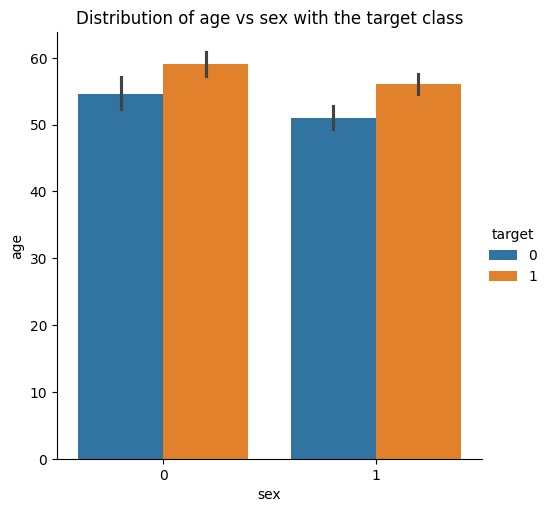

In [10]:
# distribution of target vs age
sns.catplot(kind='bar', data=df, y='age', x='sex', hue='target')
plt.title("Distribution of age vs sex with the target class")
plt.show()

# Bài tập 3
(sử dụng KNN cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật KNN để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski'

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Build KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
knn_classifier.fit(X_train, y_train)

# Predict and Evaluate test set
y_pred = knn_classifier.predict(X_test)
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = knn_classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print(cm_test)
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print(f"Accuracy for train set for KNeighborsClassifier {accuracy_for_train}")
print(f"Accuracy for test set for KNeighborsClassifier {accuracy_for_test}")

[[22 12]
 [ 7 20]]
Accuracy for train set for KNeighborsClassifier 0.76
Accuracy for test set for KNeighborsClassifier 0.69


# Bài tập 4
(sử dụng SVM cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật SVM để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: kernel = 'rbf', random_state=42

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Build SVM
svc_classifier = SVC(kernel='rbf', random_state=42)
svc_classifier.fit(X_train, y_train)

# Predict and Evaluate test set
y_pred = svc_classifier.predict(X_test)
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = knn_classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print(cm_test)
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print(f"Accuracy for train set for SVM {accuracy_for_train}")
print(f"Accuracy for test set for SVM {accuracy_for_test}")

[[26 17]
 [ 3 15]]
Accuracy for train set for SVM 0.76
Accuracy for test set for SVM 0.67


# Bài tập 5
(sử dụng Naive Bayes cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật Naive Bayes để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: kernel = 'rbf', random_state=42

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Build SVM
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict and Evaluate test set
y_pred = nb_classifier.predict(X_test)
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = knn_classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print(cm_test)
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print(f"Accuracy for train set for GaussianNB {accuracy_for_train}")
print(f"Accuracy for test set for GaussianNB {accuracy_for_test}")

[[26  7]
 [ 3 25]]
Accuracy for train set for GaussianNB 0.76
Accuracy for test set for GaussianNB 0.84


# Bài tập 6
(sử dụng **Decision Tree** cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật Decision Tree để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: criterion='gini', max_depth=10, min_samples_split=2

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Build SVM
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2)
dt_classifier.fit(X_train, y_train)

# Predict and Evaluate test set
y_pred = dt_classifier.predict(X_test)
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = knn_classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print(cm_test)
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print(f"Accuracy for train set for DecisionTree {accuracy_for_train}")
print(f"Accuracy for test set for DecisionTree {accuracy_for_test}")

[[22  9]
 [ 7 23]]
Accuracy for train set for DecisionTree 0.76
Accuracy for test set for DecisionTree 0.74


# Bài tập 7
(sử dụng Random Forest cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật Random Forest để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: criterion='gini', max_depth=10, min_samples_split=2, n_estimators = 10, random_state=42

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Build SVM
rf_classifier = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators = 10, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict and Evaluate test set
y_pred = rf_classifier.predict(X_test)
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = knn_classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print(cm_test)
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print(f"Accuracy for train set for RandomForest {accuracy_for_train}")
print(f"Accuracy for test set for RandomForest {accuracy_for_test}")

[[25  8]
 [ 4 24]]
Accuracy for train set for RandomForest 0.76
Accuracy for test set for RandomForest 0.8


# Bài tập 8:
(sử dụng Adaboost cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng
giải thuật Adaboost để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: n_estimators=50, learning_rate=1.0

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Build SVM
adaboost_classifier = AdaBoostClassifier(n_estimators = 50, learning_rate=1.0)
adaboost_classifier.fit(X_train, y_train)

# Predict and Evaluate test set
y_pred = adaboost_classifier.predict(X_test)
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = knn_classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print(cm_test)
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print(f"Accuracy for train set for AdaBoost {accuracy_for_train}")
print(f"Accuracy for test set for AdaBoost {accuracy_for_test}")

[[26  7]
 [ 3 25]]
Accuracy for train set for AdaBoost 0.76
Accuracy for test set for AdaBoost 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


# Bài tập 9:
(sử dụng GradientBoost cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử
dụng giải thuật GradientBoost để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3, random_state=42

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Build SVM
gradientBoost_classifier = GradientBoostingClassifier(n_estimators = 50, learning_rate=1.0)
gradientBoost_classifier.fit(X_train, y_train)

# Predict and Evaluate test set
y_pred = gradientBoost_classifier.predict(X_test)
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = knn_classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print(cm_test)
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print(f"Accuracy for train set for GradientBoosting {accuracy_for_train}")
print(f"Accuracy for test set for GradientBoosting {accuracy_for_test}")

[[27  8]
 [ 2 24]]
Accuracy for train set for GradientBoosting 0.76
Accuracy for test set for GradientBoosting 0.84


# Bài tập 10:
(sử dụng XGboost cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng
giải thuật XGboost để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: objective="binary:logistic", random_state=42, n_estimators = 100

In [43]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import confusion_matrix

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Build SVM
xgBoost_classifier = xgb.XGBClassifier(objective="binary:logistic", random_state=42, n_estimators = 100)
xgBoost_classifier.fit(X_train, y_train)

# Predict and Evaluate test set
y_pred = xgBoost_classifier.predict(X_test)
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = knn_classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print(cm_test)
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print(f"Accuracy for train set for GradientBoosting {accuracy_for_train}")
print(f"Accuracy for test set for GradientBoosting {accuracy_for_test}")

[[26  5]
 [ 3 27]]
Accuracy for train set for GradientBoosting 0.76
Accuracy for test set for GradientBoosting 0.87


# Bài tập 11:
(sử dụng kỷ thuật Stacking cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng kỹ thuật Stacking để dự đoán bệnh nhân có khả bị bệnh tim hay bằng cách dùng phương pháp stacking sử dụng heterogeneous approach với mô hình giải thuật được thể hiện ở hình 1.

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

dtc = DecisionTreeClassifier(random_state = 42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = xgb.XGBClassifier(random_state=42)
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

classifier = StackingClassifier(estimators=[('dtc', dtc),
                                            ('rfc', rfc),
                                            ('knn', knn),
                                            ('xgb', xgb),
                                            ('gc', gc),
                                            ('svc', svc),
                                            ('ad', ad)])
classifier.fit(X_train, y_train)
# Predict and Evaluate test set
y_pred = classifier.predict(X_test)
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = knn_classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print(cm_test)
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print(f"Accuracy for train set for StackingClassifier {accuracy_for_train}")
print(f"Accuracy for test set for StackingClassifier {accuracy_for_test}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[[27  5]
 [ 2 27]]
Accuracy for train set for StackingClassifier 0.76
Accuracy for test set for StackingClassifier 0.89


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
